In [1]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

In [4]:
cv2.__version__

'4.5.2'

In [10]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)

In [7]:
aruco_dict

<aruco_Dictionary 000002046FB68230>

<IPython.core.display.Javascript object>


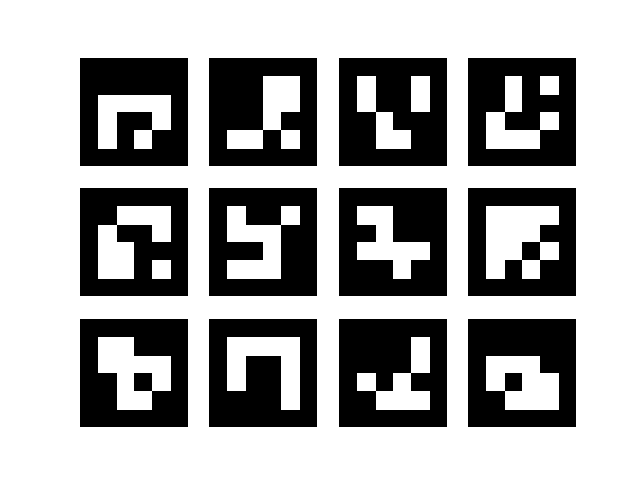

In [11]:
fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny + 1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict, i, 100)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("markers.pdf")
plt.show()

In [12]:
FILE = '../data/positions/theremin/aruco_153_0.jpg'

<IPython.core.display.Javascript object>


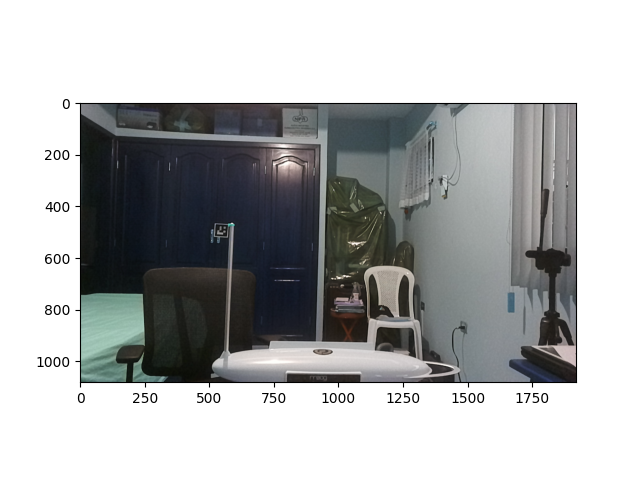

In [13]:
frame = cv2.imread(FILE)
plt.figure()
plt.imshow(frame)
plt.show()

In [16]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

Wall time: 152 ms


<IPython.core.display.Javascript object>


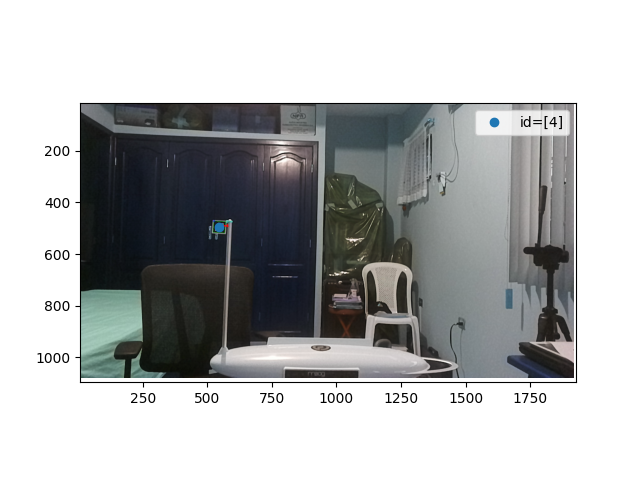

In [17]:
plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

In [20]:
corners

[array([[[526., 472.],
         [571., 474.],
         [567., 518.],
         [522., 515.]]], dtype=float32)]

In [30]:
corners[0][0,:,0]

array([526., 571., 567., 522.], dtype=float32)

In [31]:
corners[0][0,:,1]

array([472., 474., 518., 515.], dtype=float32)

In [32]:
np.argmin(corners[0][0,:,0])

3

In [33]:
np.argmax(corners[0][0,:,0])

1

In [37]:
corners[0][0,0], corners[0][0,3]

(array([526., 472.], dtype=float32), array([522., 515.], dtype=float32))

<IPython.core.display.Javascript object>


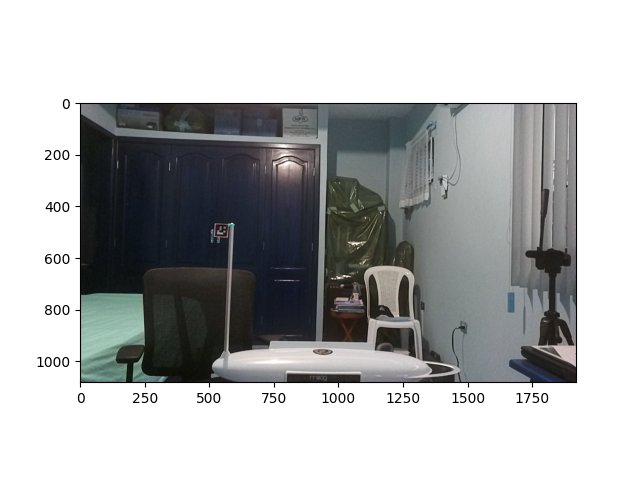

In [48]:
gr = cv2.rectangle(frame.copy(), (int(corners[0][0,0,0]), int(corners[0][0,0,1])), (int(corners[0][0,2,0]), int(corners[0][0,2,1])), (255,0,0),1)
plt.figure()
plt.imshow(gr)
plt.show()

In [40]:
corners[0][0,0,0]

526.0